<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center>Тема 2. Візуальний аналіз даних з Python
## <center>Частина 2. Приклад візуального аналізу даних

Прочитуємо в DataFrame знайомі нам по першій лекції дані відтоку клієнтів телеком-оператора.

In [1]:
import numpy as np
import pandas as pd

# Matplotlib є основою для візуалізації в Python
import matplotlib.pyplot as plt

# будемо використовувати бібліотеку Seaborn
import seaborn as sns
sns.set()

# графіки у форматі Retina виглядають більш чіткими
%config InlineBackend.figure_format = 'retina' 

In [2]:
df = pd.read_csv('../data/telecom_churn.csv')

Перевіримо, чи все нормально зчиталося – подивимося на перші 5 рядків (метод `head`).

In [3]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Кількість рядків (клієнтів) і стовпців (ознак):

In [4]:
df.shape

(3333, 20)

Подивимося на ознаки і переконаємося, що пропусків ні в одній з них немає – скрізь по 3333 записи.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


<details>
<summary>Опис ознак</summary>
<p>
    
|        Назва              |                        Опис                        | Статистичний тип ознаки |
|:----------------------    |:-------------------------------------------------  |:----------              |
| **State**                 | Символьний код штату                               | Категоріальна           |
| **Account length**        | Як довго клієнт обслуговується компанією           | Кількісна               |
| **Area code**             | Префікс номера телефону                            | Категоріальна           |
| **International plan**    | Міжнародний роумінг (підключений / не підключений) | Бінарна                 |
| **Voice mail plan**       | Голосова пошта (підключена / не підключена)        | Бінарна                 |
| **Number vmail messages** | Кількість голосових повідомлень                    | Кількісна               |
| **Total day minutes**     | Загальна тривалість розмов вдень                   | Кількісна               |
| **Total day calls**       | Загальна кількість дзвінків вдень                  | Кількісна               |
| **Total day charge**      | Загальна сума оплати за послуги вдень              | Кількісна               |
| **Total eve minutes**     | Загальна тривалість розмов ввечері                 | Кількісна               |
| **Total eve calls**       | Загальна кількість дзвінків ввечері                | Кількісна               |
| **Total eve charge**      | Загальна сума оплати за послуги ввечері            | Кількісна               |
| **Total night minutes**   | Загальна тривалість розмов вночі                   | Кількісна               |
| **Total night calls**     | Загальна кількість дзвінків вночі                  | Кількісна               |
| **Total night charge**    | Загальна сума оплати за послуги вночі              | Кількісна               |
| **Total intl minutes**    | Загальна тривалість міжнародних розмов             | Кількісна               |
| **Total intl calls**      | Загальна кількість міжнародних розмов              | Кількісна               |
| **Total intl charge**     | Загальна сума оплати за міжнародні розмови         | Кількісна               |
| **Customer service calls**| Кількість звернень до сервісного центру            | Порядкова               |

Цільова змінна: **Churn** – ознака відтоку, бінарна ознака (Значення True – втрата клієнта, тобто відтік). Пізніше ми будемо будувати моделі, які прогнозують цю ознаку за іншими, тому і назвали її цільовою.

</p>
</details>

Подивимося на розподіл цільового класу – відтоку клієнтів.

In [6]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

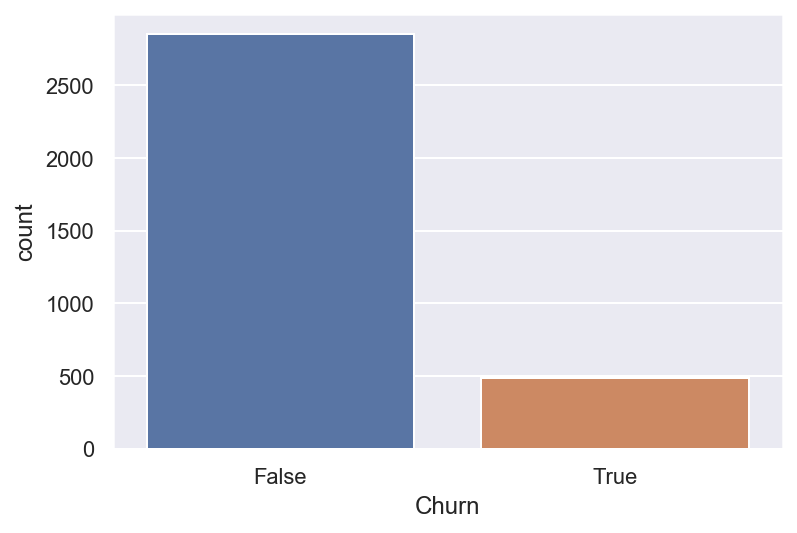

In [7]:
sns.countplot(x='Churn', data=df);

Виділимо наступні групи ознак (серед усіх крім *Churn*):
 - бінарні: *International plan*, *Voice mail plan*
 - категоріальні: *State*, *Area code*
 - порядкові: *Customer service calls* (ознаку можна вважати як кількісною цілочисельною, так і порядковою)
 - кількісні: всі інші

Подивимося на кореляції кількісних ознак.

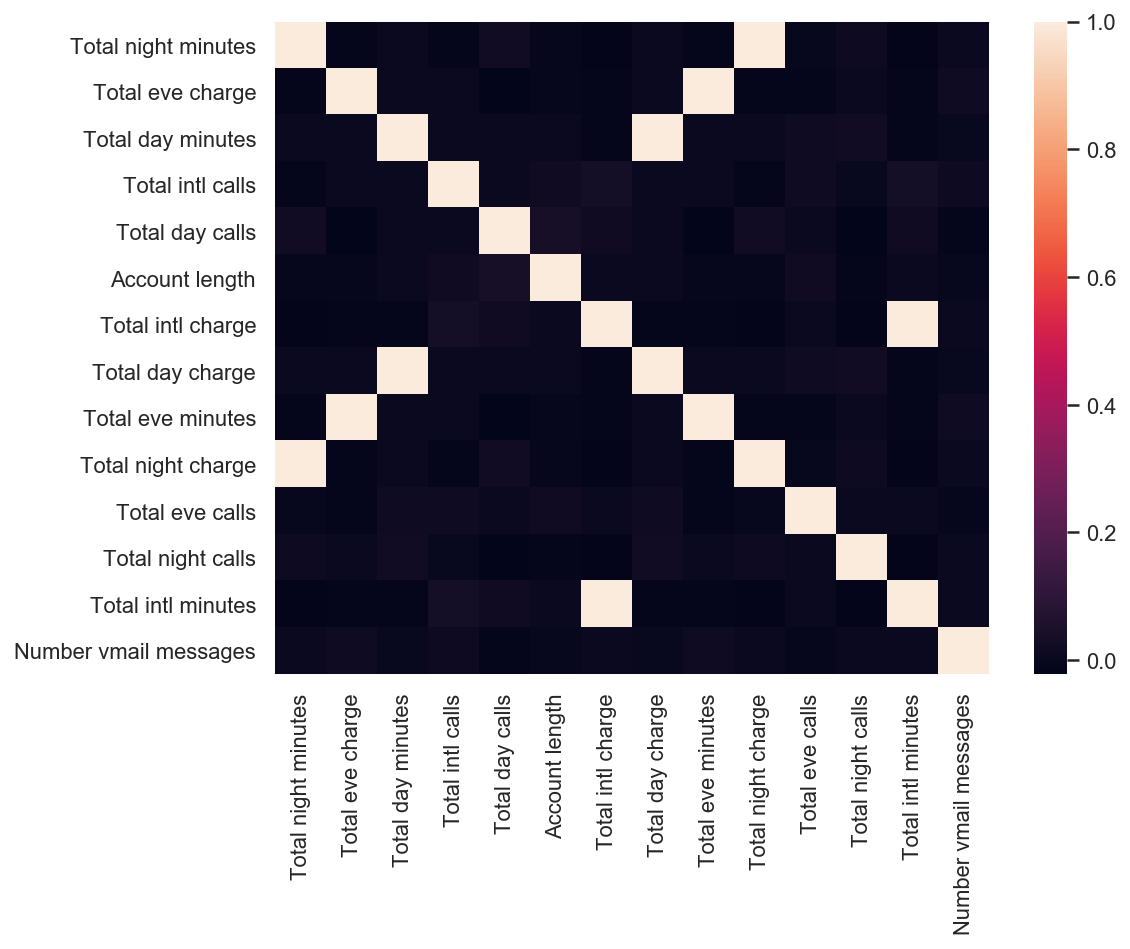

In [8]:
# Створюємо список з назвами стовпців, що відповідають кількісним ознакам
quantitative = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Обчислюємо та будуємо графік 
corr_matrix = df[quantitative].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix);

По розфарбованій матриці кореляцій бачимо, що такі ознаки як *Total day charge* обчислюються безпосередньо за проговореними хвилинами (*Total day minutes*). Такі ознаки можна викинути, оскільки вони не вносять додаткової інформації. Позбудемося їх:

In [9]:
quantitative = list(set(quantitative) - set(['Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge']))

Подивимося на розподіл всіх кількісних ознак, що нас цікавлять. На бінарні/категоріальні/порядкові ознаки будемо дивитися окремо.

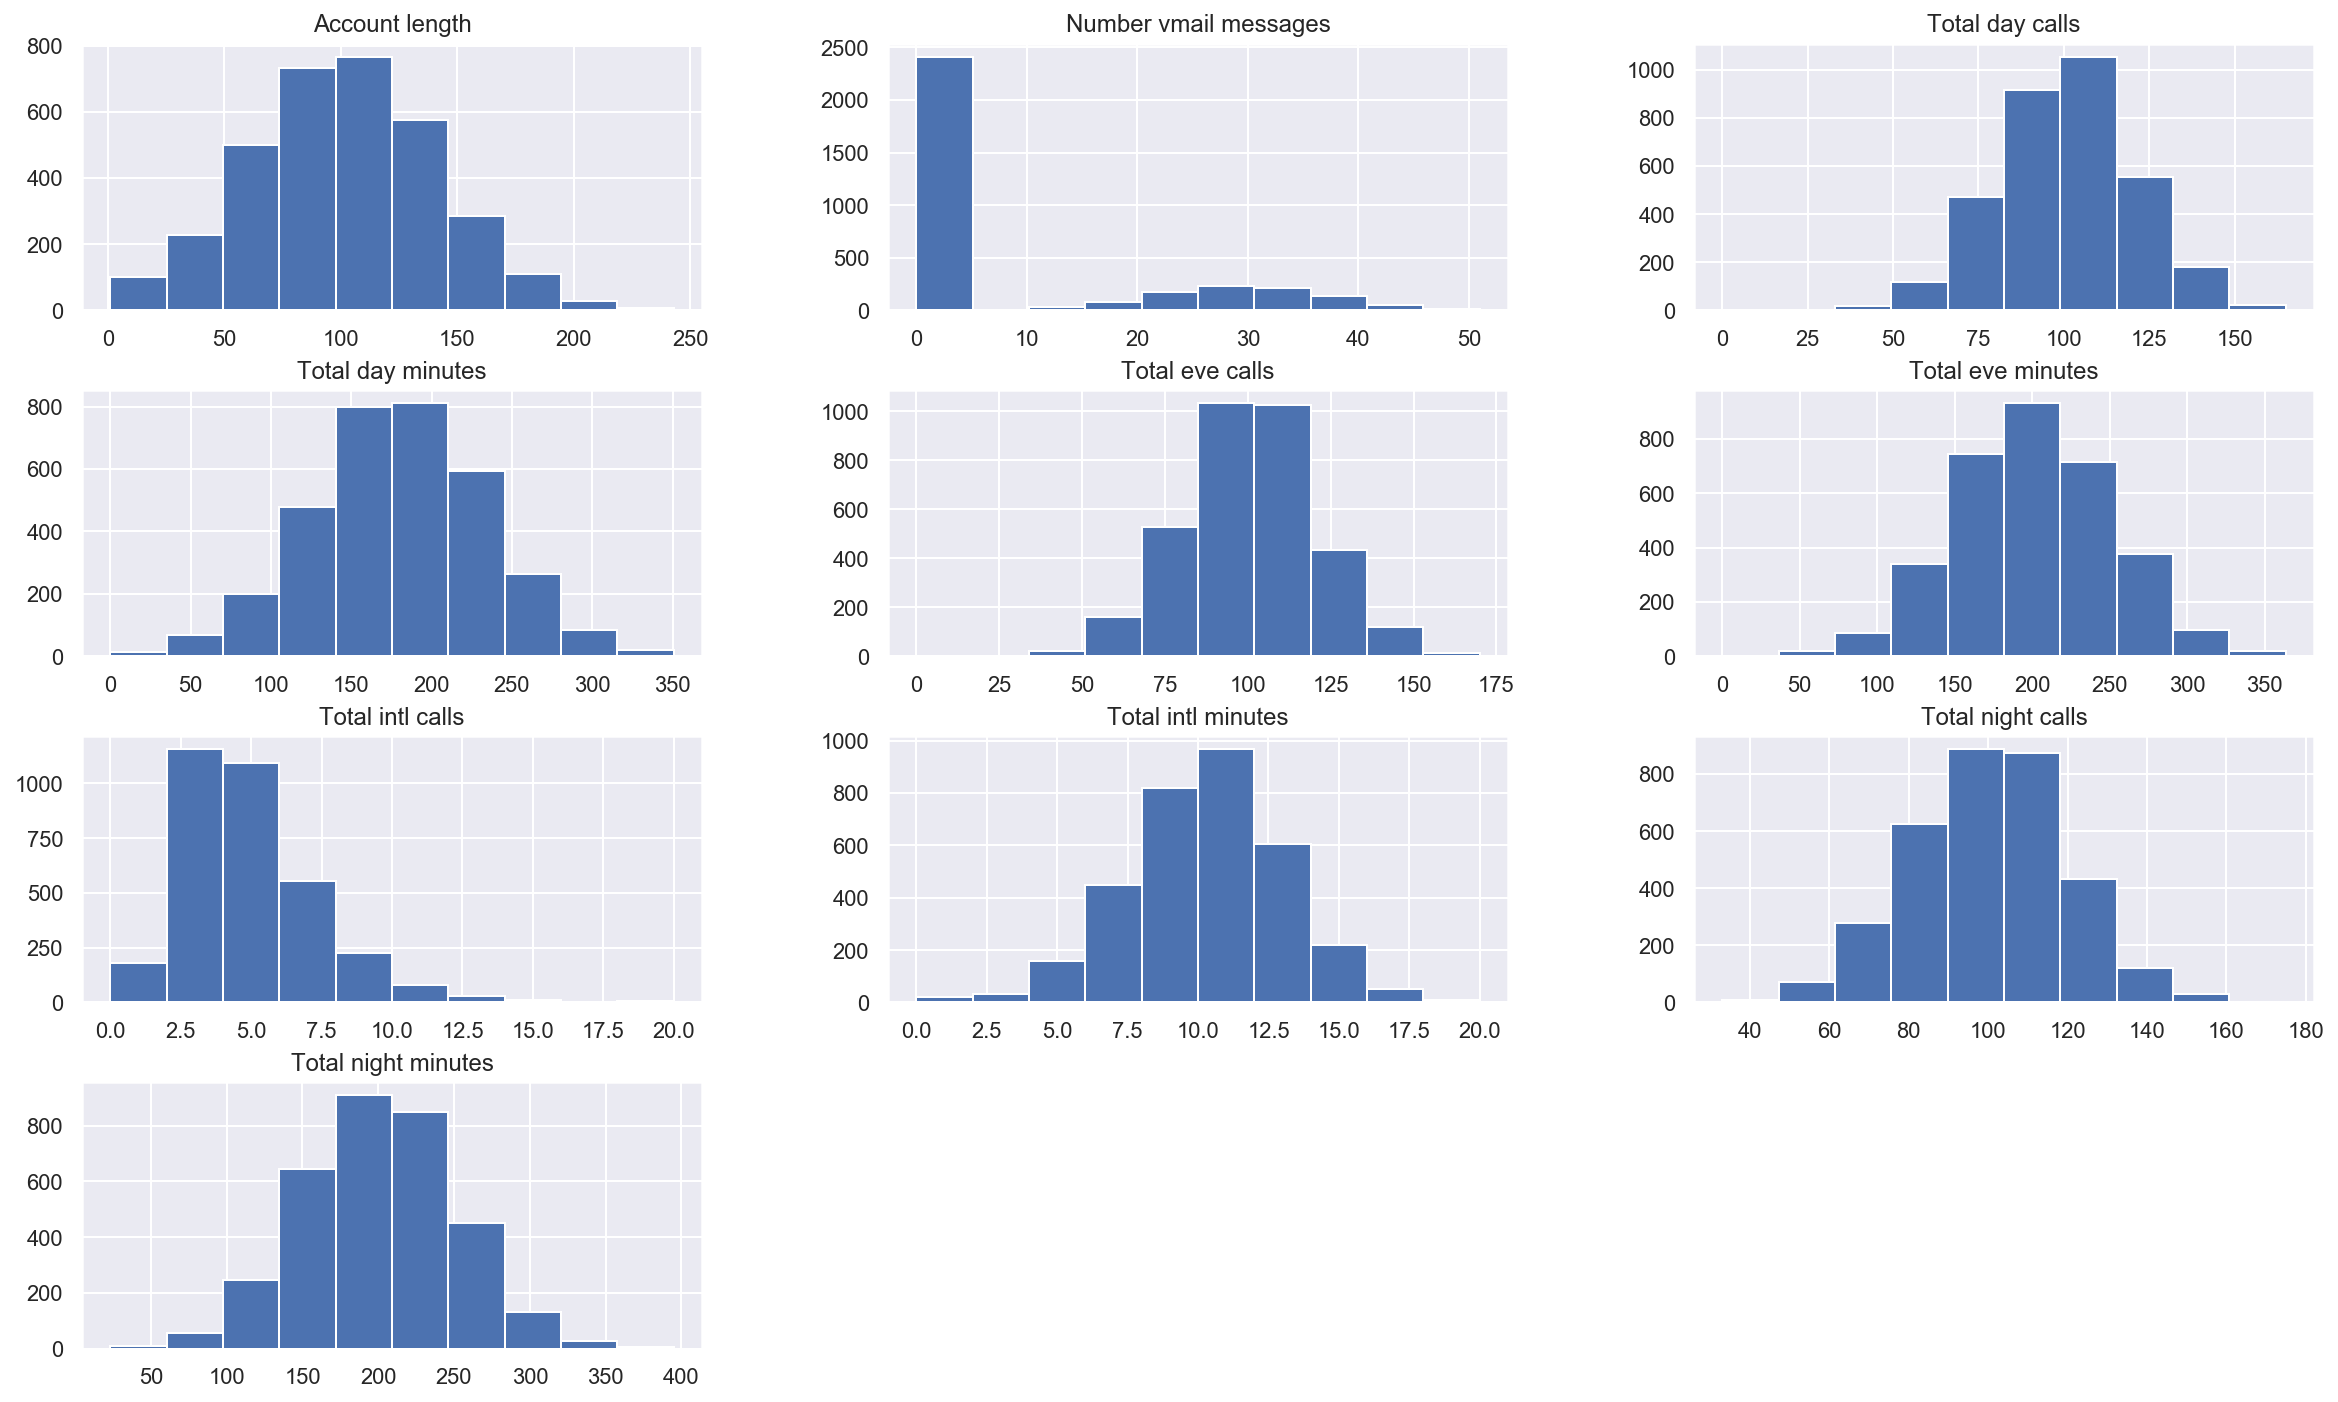

In [10]:
df[quantitative].hist(figsize=(20,12));

Бачимо, що більшість ознак розподілені нормально. Виняток – кількість голосових повідомлень (*Number vmail messages*, пік в нулі, тобто це ті, у кого голосова пошта не підключена). Також зміщений розподіл кількості міжнародних дзвінків (*Total intl calls*).

Ще корисно будувати ось такі рисунки, де на головній діагоналі зображаються розподіли ознак, а поза головною діагоналлю – діаграми розсіювання для пар ознак. Буває, що це призводить до якихось висновків, але в даному випадку все приблизно зрозуміло, без сюрпризів.

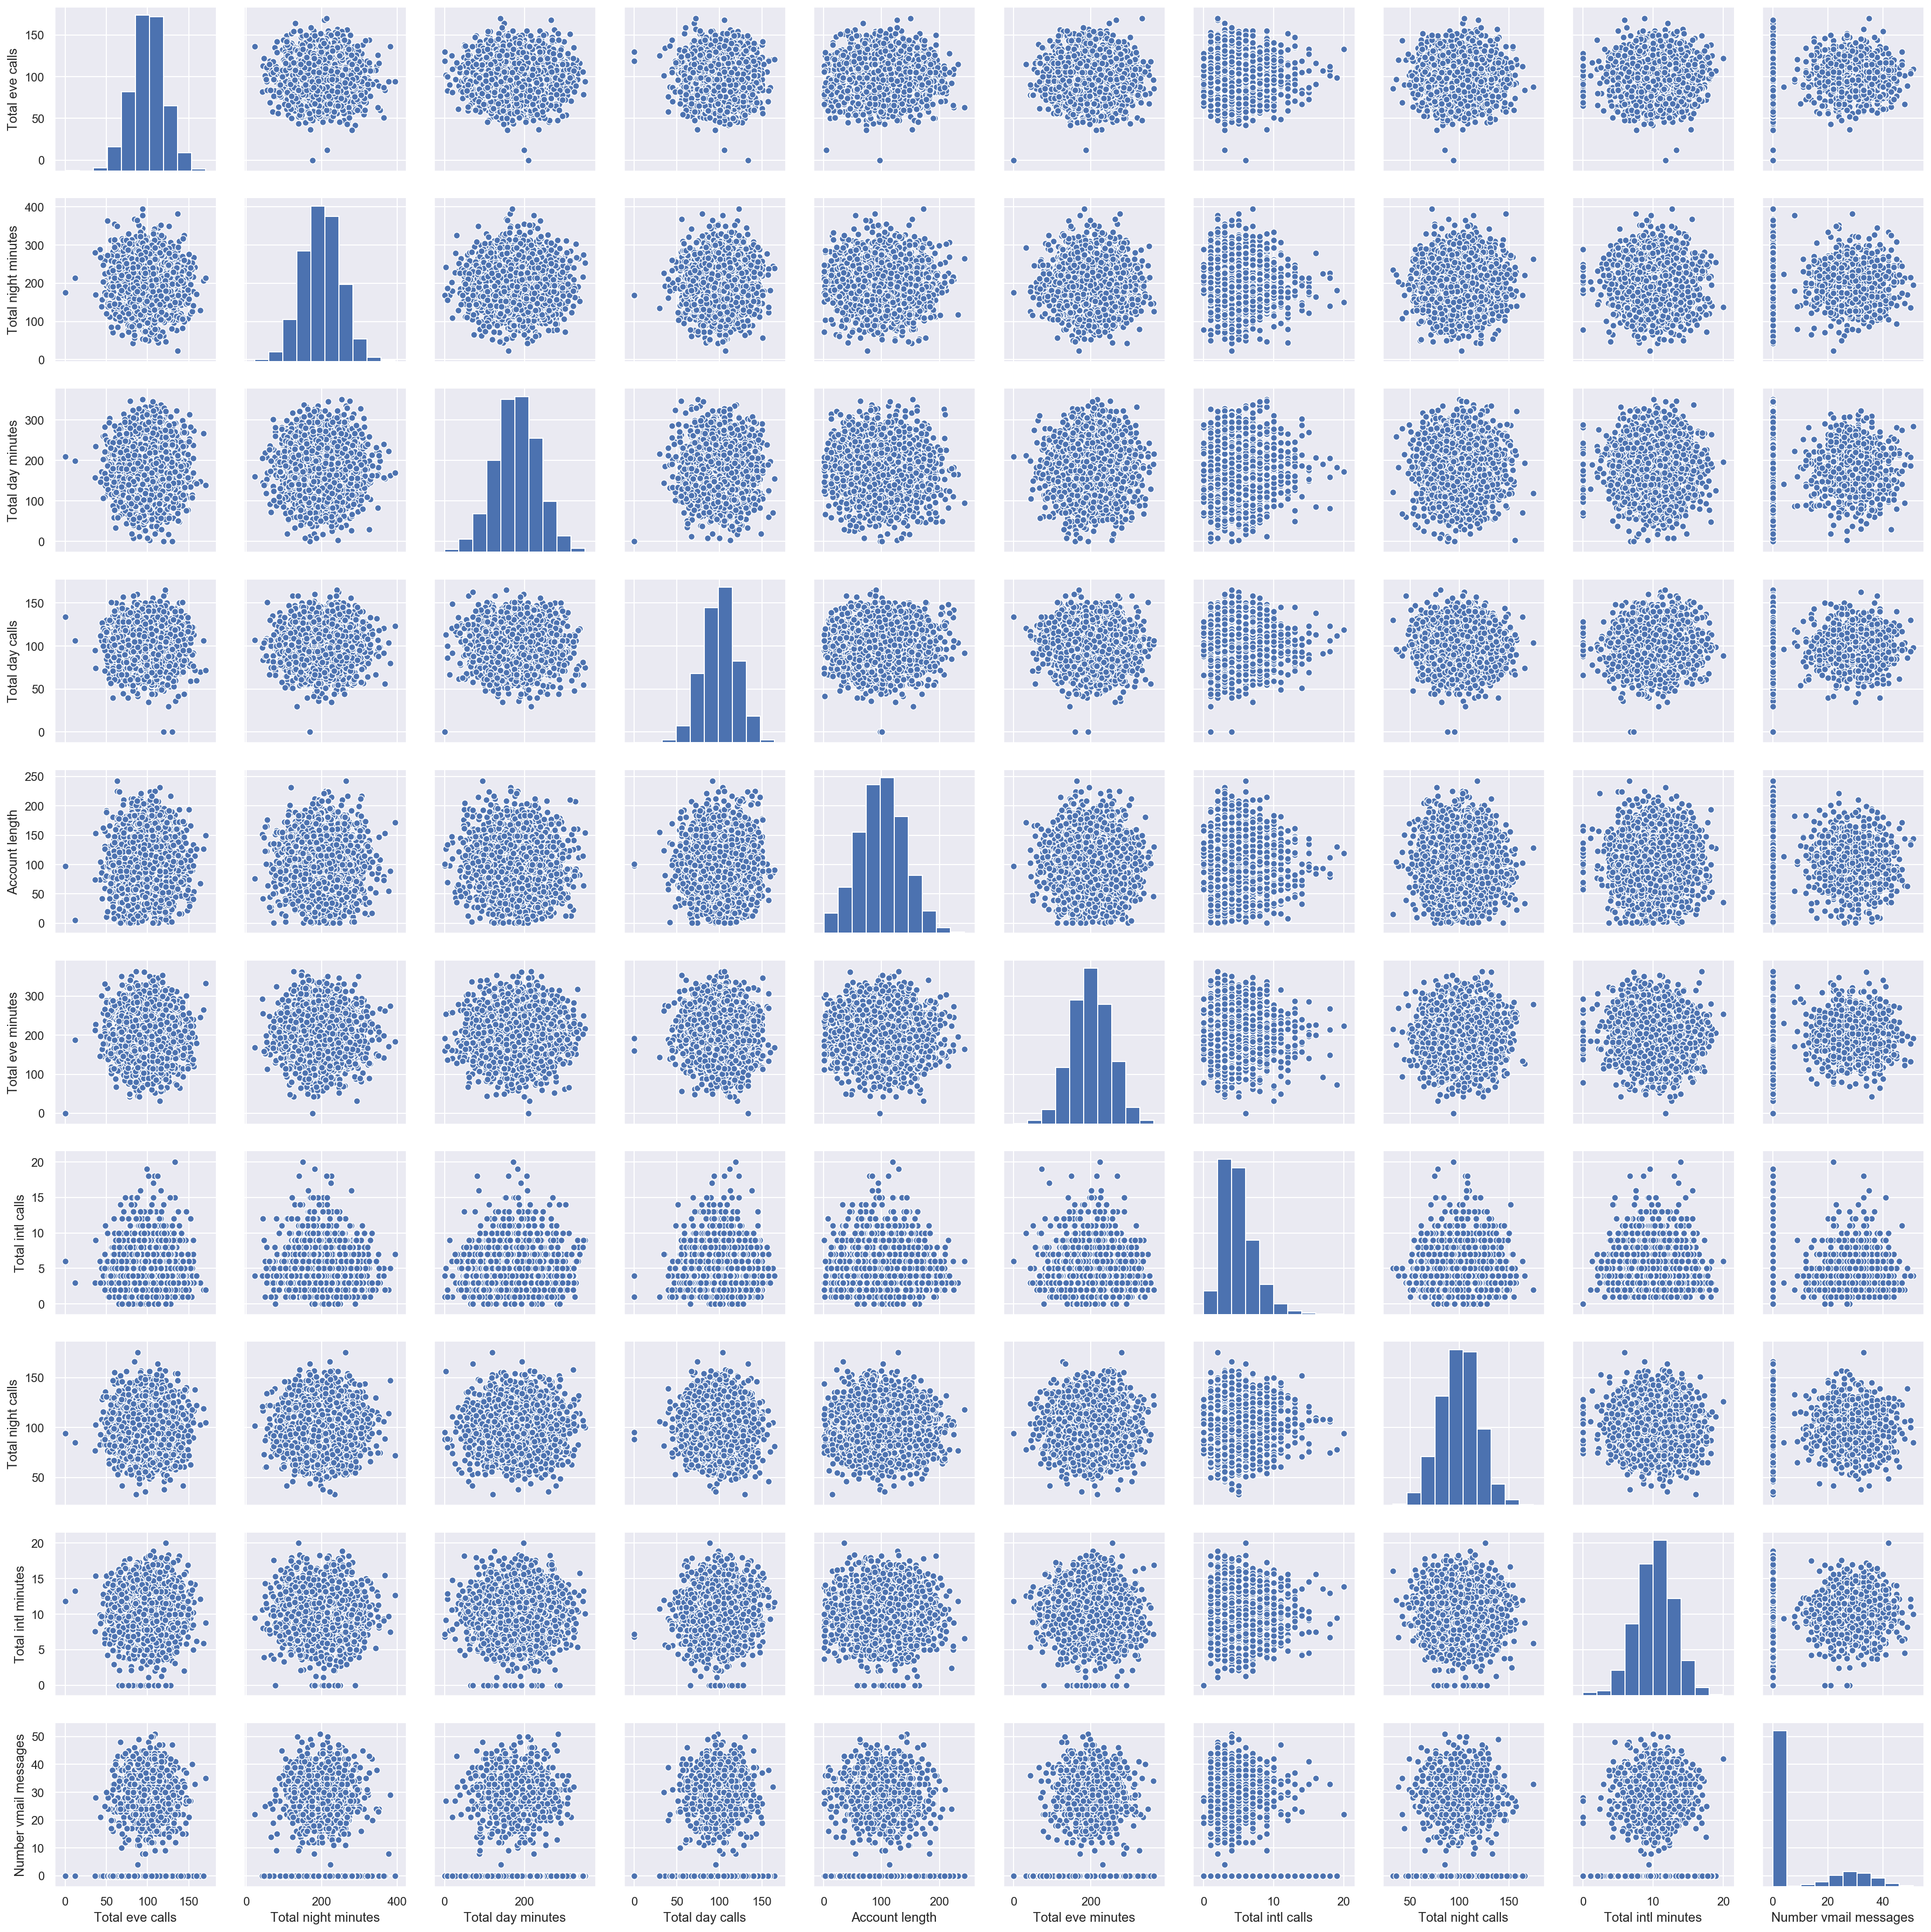

In [11]:
sns.pairplot(df[quantitative]);

**Далі подивимося, як ознаки пов'язані з цільовою – з відтоком.**

Побудуємо boxplot-и, які описують статистики розподілу кількісних ознак в двох групах: серед лояльних клієнтів і тих, що пішли.

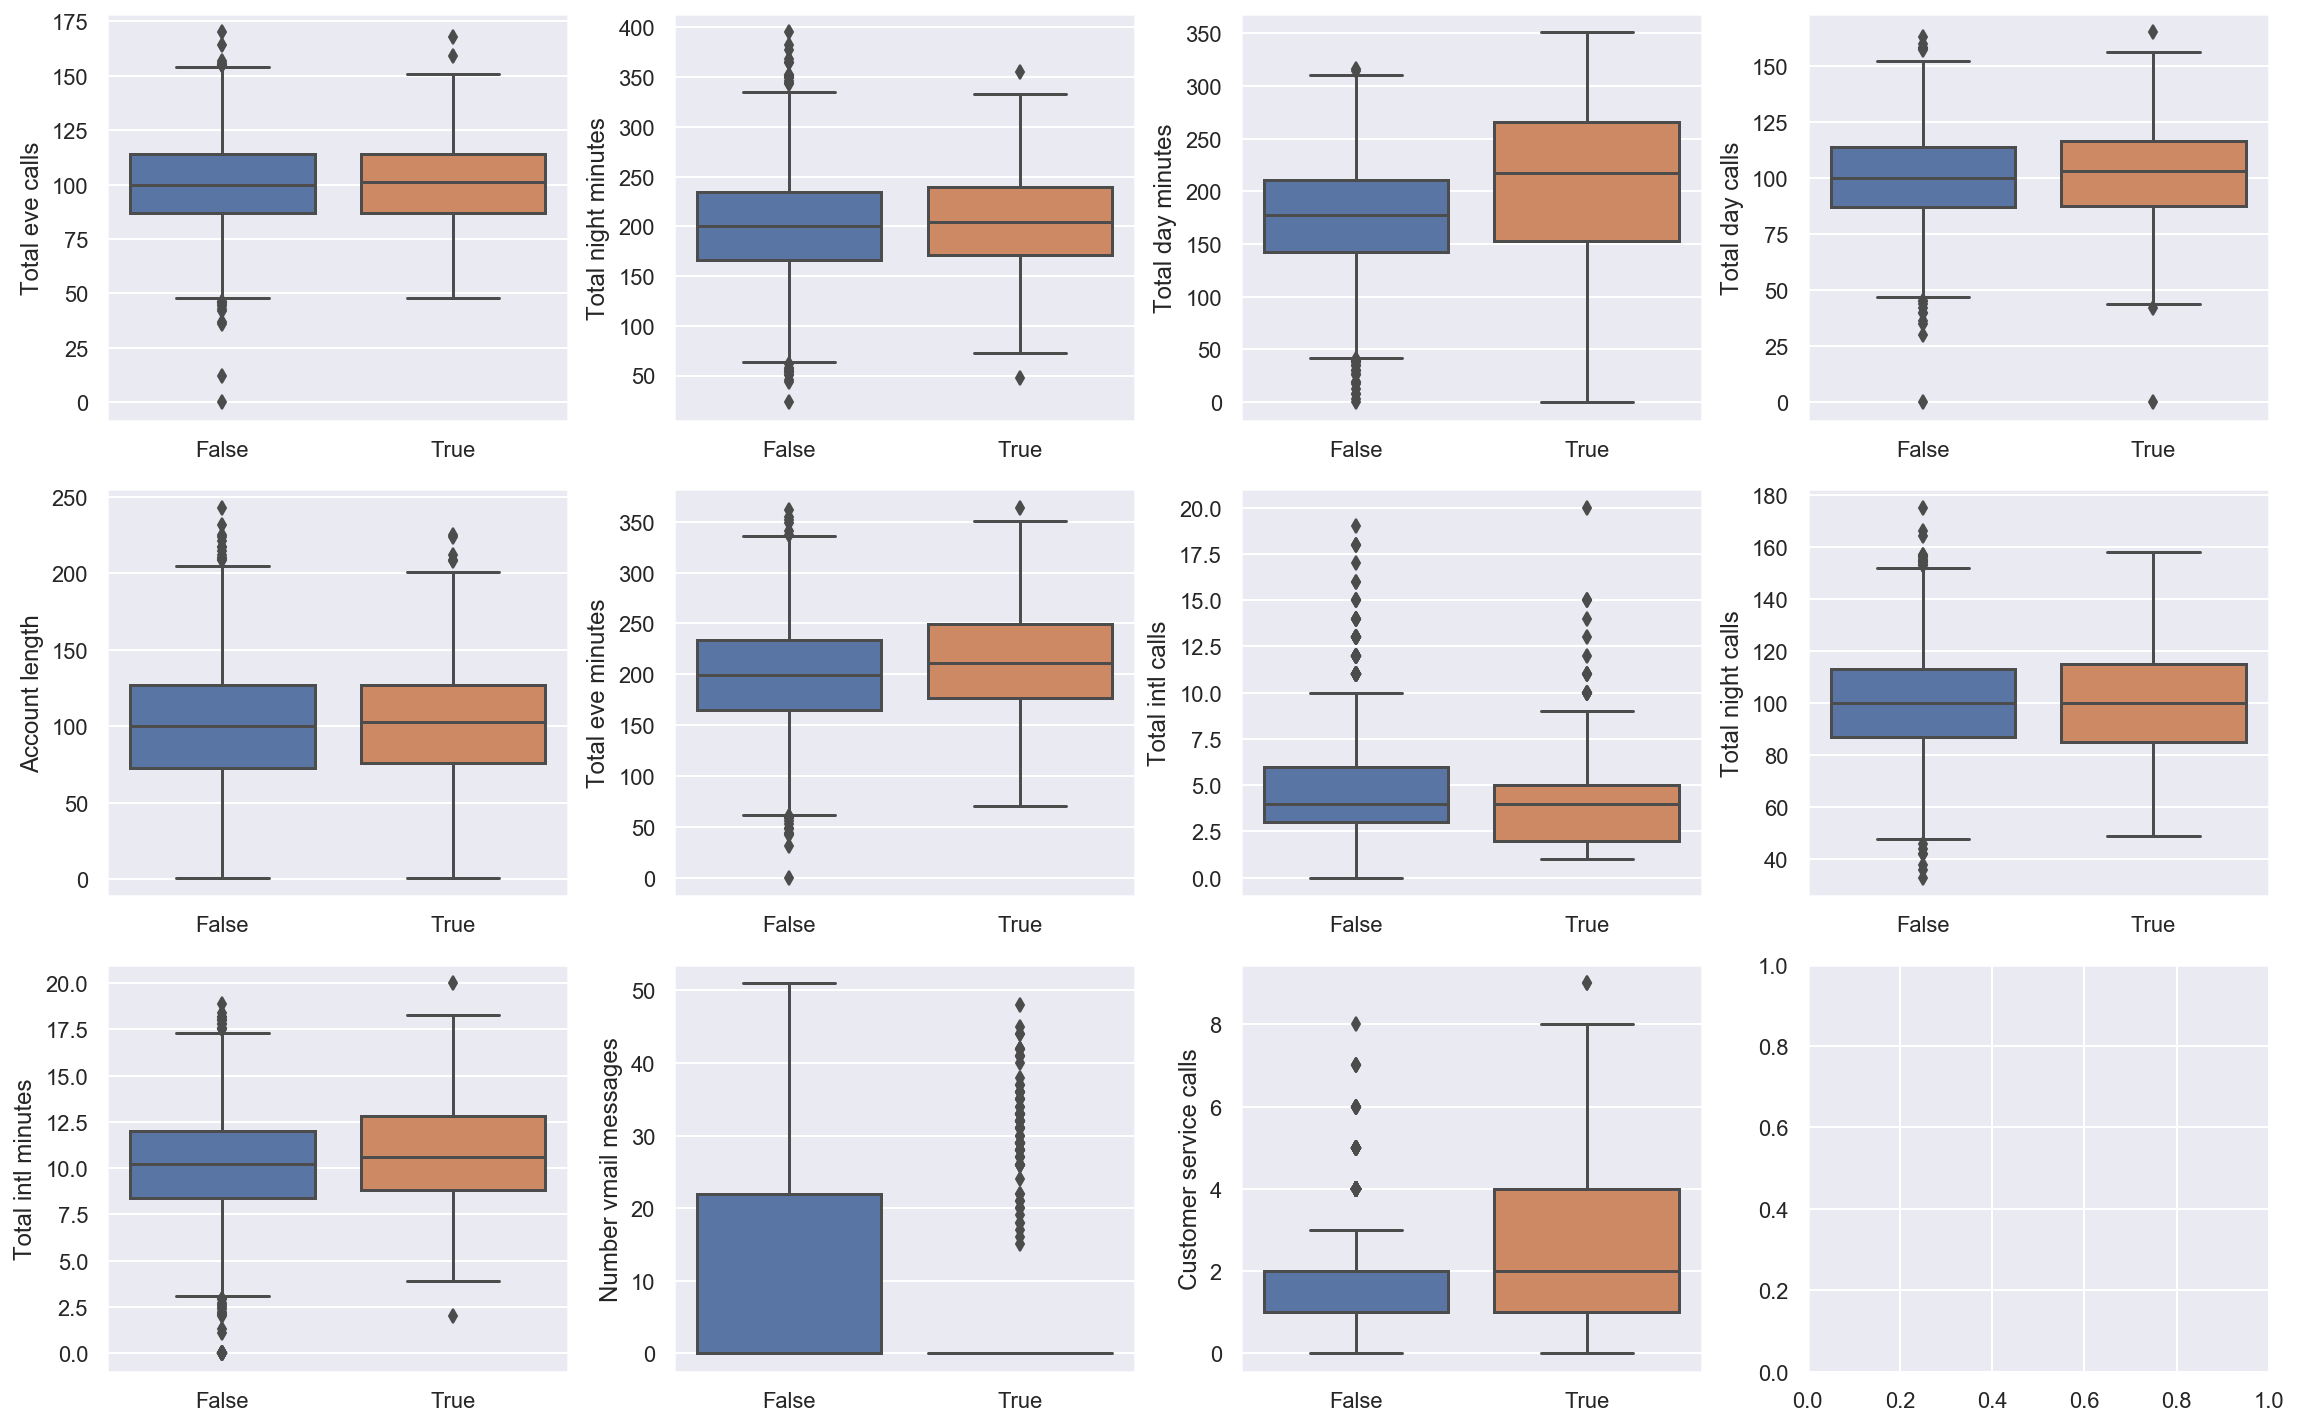

In [12]:
# Іноді можна проаналізувати порядкову ознаку так само, як кількісну
quantitative.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, feat in enumerate(quantitative):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

На око найбільшу відмінність бачимо для ознак *Total day minutes*, *Customer service calls* і *Number vmail messages*. Згодом ми навчимося визначати важливість ознак в задачі класифікації за допомогою випадкового лісу (або градієнтного бустингу), і виявиться, що перші дві – дійсно дуже важливі ознаки для прогнозування відтоку.

Подивимося окремо на рисунки з розподілом кількості проговорених вдень хвилин серед лояльних/нелояльних. Зліва - знайомі нам боксплоти, праворуч - згладжені гістограми розподілу кількісної ознаки в двох групах (швидше просто красива картинка, все і так зрозуміло по боксплоту).

Цікаве **спостереження:** в середньому клієнти, що пішли більше користуються зв'язком. Можливо, вони незадоволені тарифами, і одним із заходів боротьби з відтоком буде зниження тарифних ставок (вартості мобільного зв'язку). Але це вже компанії треба буде проводити додатковий економічний аналіз, чи дійсно такі заходи будуть виправдані.

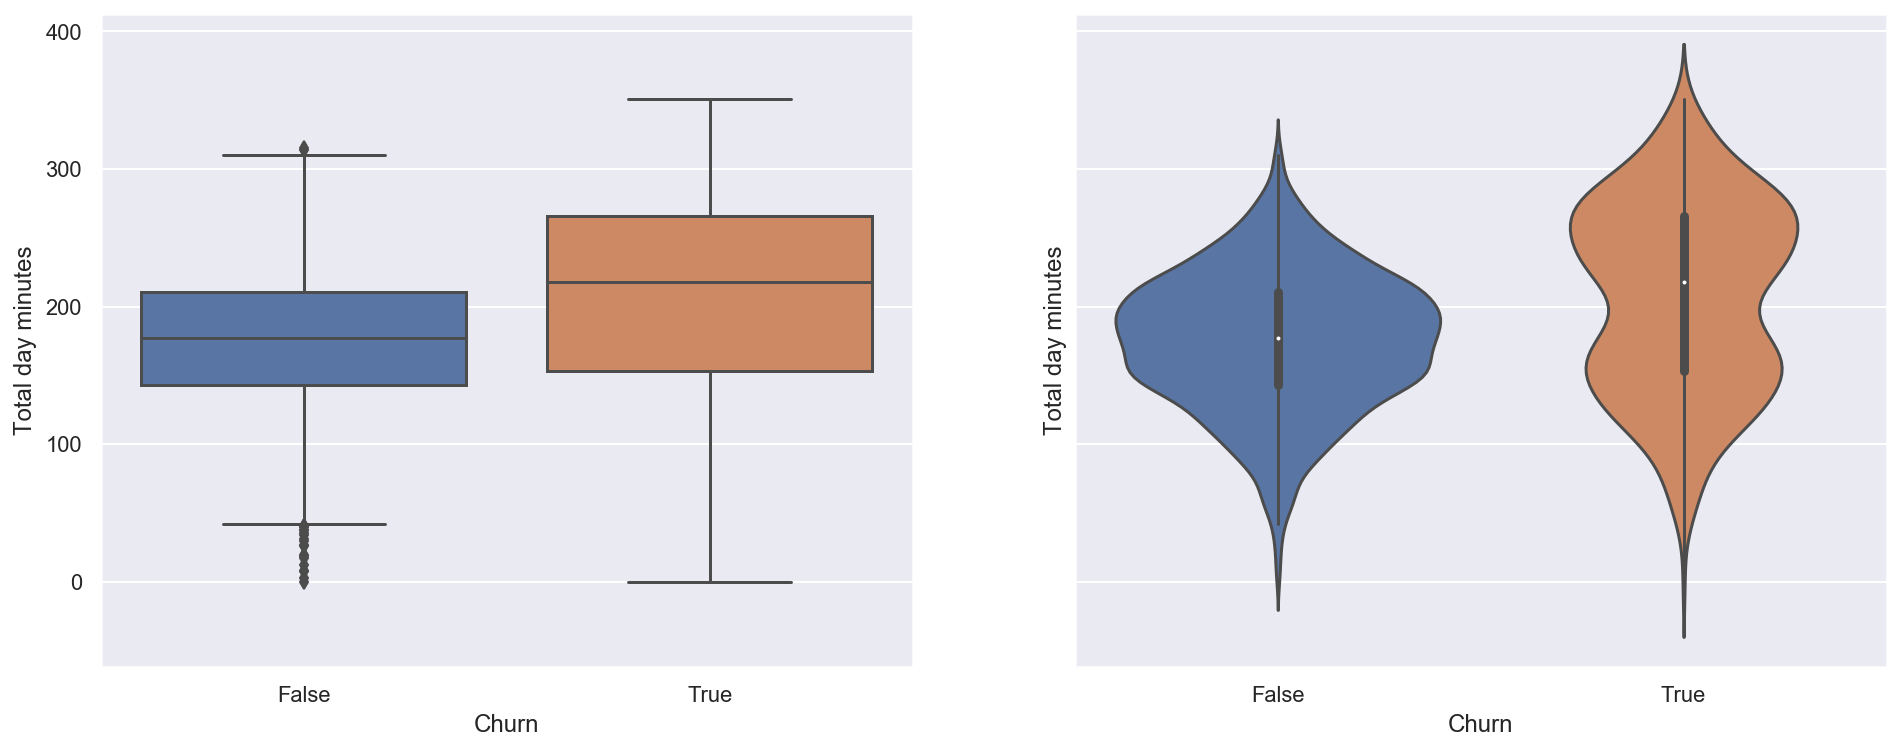

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

Тепер зобразимо розподіл кількості звернень в сервісний центр (такий графік ми будували в першій лекції). Тут унікальних значень ознаки небагато (ознаку можна вважати як кількісною цілочисельною, так і порядковою), і наочніше зобразити розподіл за допомогою `countplot`. **Спостереження:** частка відтоку сильно зростає починаючи з 4 дзвінків в сервісний центр.

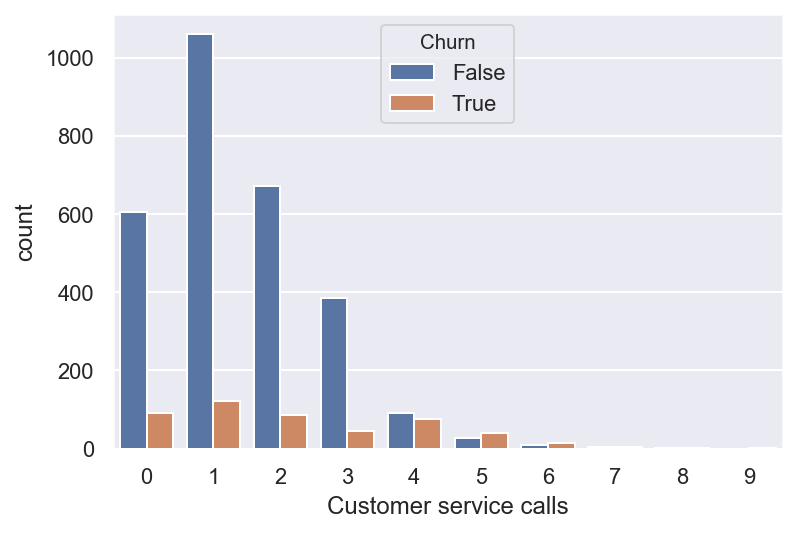

In [14]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Тепер подивимося на зв'язок бінарних ознак *International plan* і *Voice mail plan* з відтоком. **Спостереження**: коли роумінг підключений, частка відтоку набагато вища, тобто наявність міжнародного роумінгу – сильний ознака. Про голосову пошту такого не можна сказати.

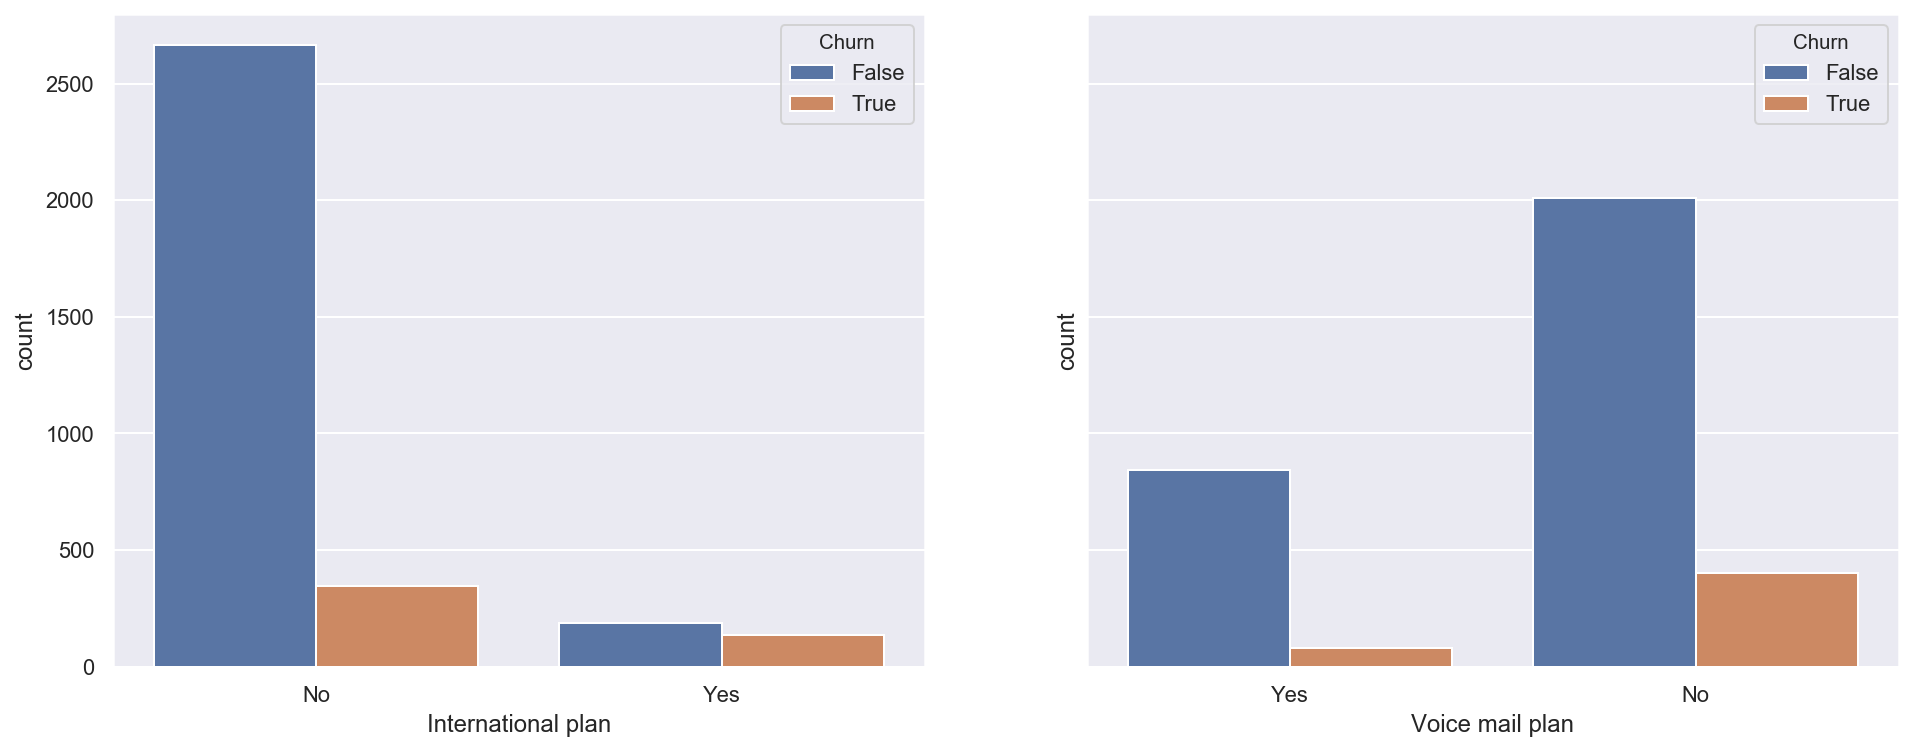

In [15]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

Нарешті, подивимося, як з відтоком пов'язана категоріальна ознака *State*. З нею вже не так приємно працювати, оскільки кількість унікальних штатів досить велика – 51. Можна на початку побудувати зведену таблицю або порахувати відсоток відтоку для кожного штату. Але ми бачимо, що даних по кожному штату окремо замало (пішли – всього від 3 до 18), тому, можливо, ознаку *State* згодом не варто додавати в моделі класифікації через ризик *перенавчання* (але ми це будемо перевіряти на *крос-валідації*).

In [16]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

Частки відтоку для кожного штату:

In [17]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

Бачимо, що в Нью-Джерсі і Каліфорнії частка відтоку більша за 25%, а на Гаваях і Алясці менша за 5%. Але ці висновки побудовані на занадто скромній статистиці і можливо, це просто особливості наявних даних.

Нарешті побудуємо t-SNE (t-distributed Stohastic Neighbor Embedding) представлення даних. Основна ідея методу: знайдемо таке відображення з багатовимірного простору ознак на площину (або в 3D, але майже завжди вибирають 2D), щоб точки, які були далеко одна від одної, на площині теж виявилися віддаленими, а близькі точки – також відобразилися на близькі. Тобто neighbor embedding – це свого роду пошук нового представлення даних, при якому зберігається сусідство.

Трохи деталей: викинемо штати і ознаку відтоку, бінарні Yes/No-ознаки переведемо в числа (за допомогою [`pandas.Series.map`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)). Також потрібно масштабувати вибірку – з кожної ознаки відняти її середнє і поділити на стандартне відхилення (середнє квадратичне відхилення), це робить `StandardScaler`.

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [19]:
# перетворюємо всі ознаки в кількісні, викинувши штати
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 32.9 s


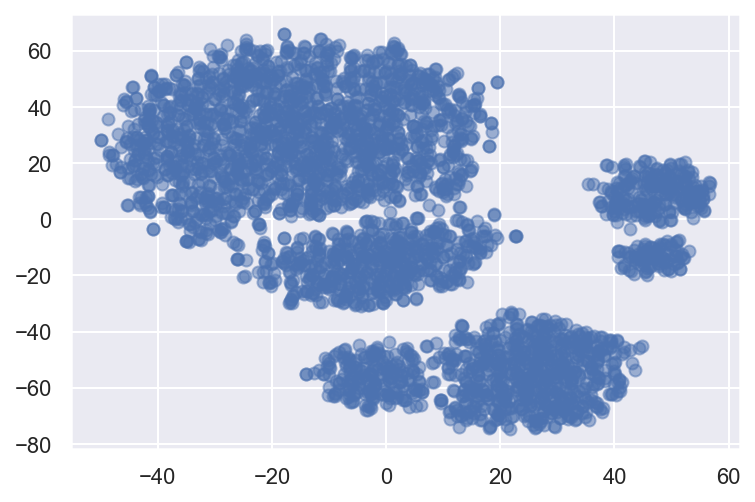

In [21]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], alpha=.5);

Розфарбуємо отримане t-SNE представлення даних за відтоком (сині – лояльні, помаранчеві – нелояльні).

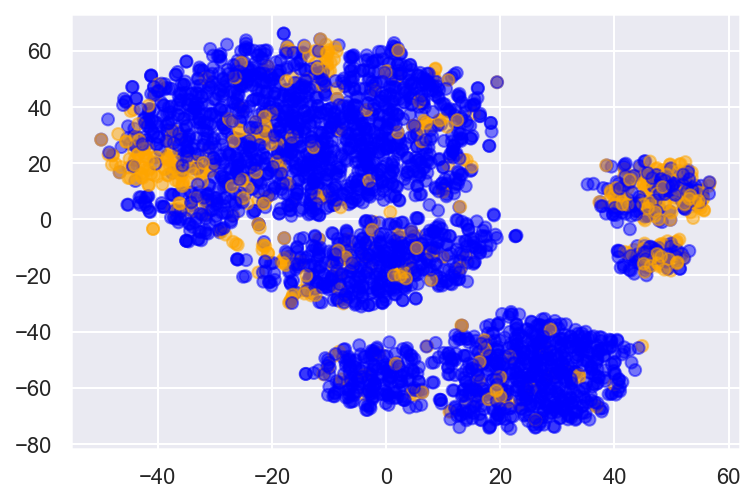

In [22]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

Бачимо, що клієнти, які пішли переважно "групуються" в деяких областях простору ознак.

Щоб краще зрозуміти рисунок, можна також розфарбувати його за іншими бінарними ознаками - роумінгом та голосовою поштою. Сині ділянки відповідають об'єктам, які мають цю бінарну ознаку.

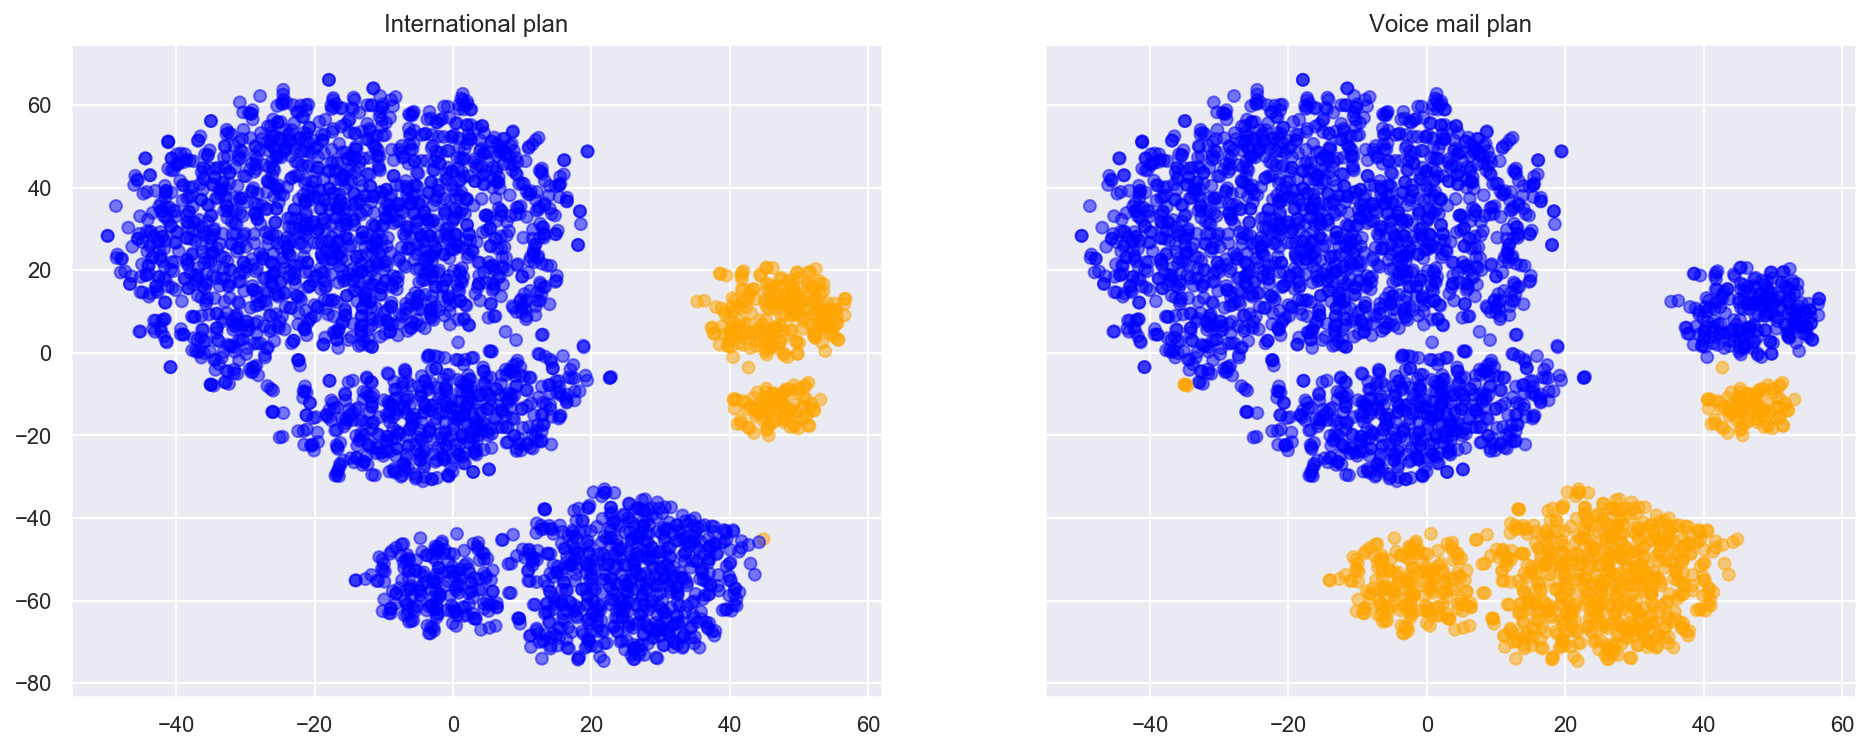

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

Тепер зрозуміло, що, наприклад, багато нелояльних клієнтів "групуються" в правому кластері людей з підключеним роумінгом, але без голосової пошти.

Зазначимо мінуси t-SNE:
 - велика обчислювальна складність. Ось ця реалізація sklearn швидше за все не допоможе у реальній задачі, на великих вибірках варто подивитися в бік [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE);
 - рисунок може сильно змінитися при зміні `random seed`, це ускладнює інтерпретацію. В цілому по таких візуалізаціях не варто робити далекоглядних висновків. Іноді щось кидається в очі і підтверджується при вивченні, але це не часто відбувається.

У випадку з рукописними цифрами за допомогою t-SNE можна дійсно отримати гарне представлення про дані.
<img src='../img/tsne_mnist.png' />
